<a href="https://colab.research.google.com/github/nicolasAT08/Miner-adeDatos/blob/main/Taller_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER PREPROCESAMIENTO**
# ***Nicolás Aranguren Turmequé***

In [ ]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute

# **1. Dado un conjunto de datos de una dimensión X = {-5.0, 23.0, 17.6, 7.23, 1.11 } normalizar usando:**

## **a. Min_max normalizacion en el Intervalo [0,1]**

In [ ]:
#Para poder operar con la lista
x = [-5.0 , 23.0 , 17.6 , 7.23 , 1.11]
np_x = np.array(x)
print(np_x)

[-5.   23.   17.6   7.23  1.11]


In [ ]:
#Intervalo [0,1]
listax = []
for i in x:
  x_norm = (i - min(x))/(max(x) - min(x))
  listax.append(x_norm) 
print(listax)

[0.0, 1.0, 0.8071428571428572, 0.4367857142857143, 0.21821428571428572]


## **b. Min_max normalizacion en el Intervalo [-*1*,1]**

In [ ]:
new_max = 1
new1_min = -1
listax1 = []
for i in x:
  x_norm1 = ((i - min(x))/(max(x) - min(x)))*(new_max - new1_min) + new1_min
  listax1.append(x_norm1) 
print(listax1)

[-1.0, 1.0, 0.6142857142857143, -0.12642857142857145, -0.5635714285714286]


## **c. Desviación estándar**

In [ ]:
import statistics
statistics.stdev(x)

11.52302347476564

## **d. Escala decimal en el intervalo [-1,1]**

In [ ]:
## PREGUNTAR

## **e. Comparar los resultados y discutir ventajas y desventajas.**

**Respuesta:** Se podría decir que la normalización en el intervalo [0,1] podría llegar a ser más fácil de manipular al no tener que operar con números negativos. Además, esta escala se asocia comunmente con la distribución de probabilidad normal, la cual se utiliza frecuentemente.

# **2. Dado un conjunto de datos de 4 dimensiones con valores perdidos:**

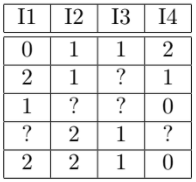

## **a. Dado que el dominio para todos los atributos es [0,1,2] ¿Cuál debe ser el número de ejemplos “artificiales” si los valores perdidos son interpretados como “no importa el valor” y ellos son remplazados con todos los posibles valores para su dominio.**

**Respuesta:** el número de ejemplos para el reemplazo de los valores perdidos debe ser de 3 ya que este es el dominio para todos los atributos del conjunto de datos.

## **b. ¿Cuál otro método utilizaría para remplazar los valores perdidos?**

**Respuesta:** considerando que el dominio admita valores reales se podrían reemplazar los valores perdidos con la media de cada atributo. Si solo se consideran los valores indicados en el dominio de los datos, se podría hacer una selección aleatoria ya que no se cuenta con un contexto de la aplicación que se requiere realizar.

# **3. El número de hijos de diferentes pacientes es dado por el siguiente vector:**

*C = {3, 1, 0, 2, 7, 3, 6, 4, −2, 0, 0, 10, 15, 6}*

## **a. Encontrar “outliers” usando parámetros estadisticos estándar: media y varianza**
**Respuesta:** con el umbral a partir de la media y la varianza ninguno de los datos es un outlier. Esto considerando que esta mide la desviación cuadrática de los datos con respecto a la media, haciendo de estos valores más grandes.

In [ ]:
# Umbral superior e ingerior con la ecuación : Umbral = media +- (2 * varianza).

x = [3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6]
np_x = np.array(x)
umbral_sup = np_x.mean() + (2 * (np_x.var()))
umbral_inf = np_x.mean() - (2 * np_x.var())
print('Umbral superior: ' + str(umbral_sup))
print('Umbral inferior: ' + str(umbral_inf))


Umbral superior: 42.91836734693877
Umbral inferior: -35.06122448979591


## **b. Si el umbral cambia de ±3 desviaciones estandar a ±2 desviaciones estandar , ¿Cuál “outlier adicional” se encuentra?**
**Respuesta:** a diferencia de la varianza, la desviasión estándar es expresada en las mismas unidades que los datos al no estar elevada al cuadrado. Esto hace que sea un más diciente. Al realizar el cálculo con **3 desviaciones** no se encuentra ningún valor fuera de este rango. Al disminuir a **2 desviaciones** se encuentra un outlier correspondiente al dato "15" encontrandose fuera del umbral superior de "12".

In [ ]:
# Umbral con 3 y 2 desviaciones estándar
x = [3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6]
np_x = np.array(x)
umbral_sup = np_x.mean() + (3*(np_x.std()))
umbral_inf = np_x.mean() - (3*(np_x.std()))
print('Umbral superior con 3 desviaciones estándar: ' + str(umbral_sup))
print('Umbral inferior con 3 desviaciones estándar: ' + str(umbral_inf))
print('-------------------------------------------------------------------')
umbral_sup1 = np_x.mean() + (2*(np_x.std()))
umbral_inf1 = np_x.mean() - (2*(np_x.std()))
print('Umbral superior con 2 desviaciones estándar: ' + str(umbral_sup1))
print('Umbral inferior con 2 desviaciones estándar: ' + str(umbral_inf1))
print('-------------------------------------------------------------------')

list_outliers = []
print('Para 3 desviaciones estándar:')
for i in np_x:
  if i < umbral_inf or i > umbral_sup:
    list_outliers.append(round(i,2))
print('Los outliers son: ' + str(list_outliers))

print('-------------------------------------------------------------------')

list_outliers1 = []
print('Para 2 desviaciones estándar:')
for i in np_x:
  if i < umbral_inf1 or i > umbral_sup1:
    list_outliers1.append(round(i, 2))
print('Los outliers son: ' + str(list_outliers1))

Umbral superior con 3 desviaciones estándar: 17.174479537593363
Umbral inferior con 3 desviaciones estándar: -9.317336680450506
-------------------------------------------------------------------
Umbral superior con 2 desviaciones estándar: 12.759176834586052
Umbral inferior con 2 desviaciones estándar: -4.902033977443194
-------------------------------------------------------------------
Para 3 desviaciones estándar:
Los outliers son: []
-------------------------------------------------------------------
Para 2 desviaciones estándar:
Los outliers son: [15]


# **4. Dado un conjunto de tres dimensiones,**
*X=[{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}]*

## **a. Describir el procedimiento e interpretar los resultados de detección de outliers basado en la media y varianza**
**Respuesta:** dado el conjunto de datos se procede a calcular la media y varianza para cada una de las dimensiones. En seguida se definen los umbrales superiores y superios a partir de la media y varianza, para de esta manera detectar los outliers de cada dimensión. Este prcedimiento por medio de media y arianza se hace por atributo o dimensión.

Finalmente se obtienen que no existen outliers en ninguna de las tres dimensiones.

In [ ]:
X=[[1,2,0],[3,1,4],[2,1,5],[0,1,6],[2,4,3],[4,4,2],[5,2,1],[7,7,7],[0,0,0],[3,3,3]]
X1 = np.array(X)
X2 = np.array(X)
X3 = np.array(X)
i = 0
columna1 = X1[:,i]
i = 1
columna2 = X2[:,i]
i = 2
columna3 = X3[:,i]
print('X1: ' + str(columna1))
print('X2: ' + str(columna2))
print('X3: ' + str(columna3))
print()
umbral_supX1 = columna1.mean() + (2*(columna1.var()))
umbral_infX1 = columna1.mean() - (2*(columna1.var()))
umbral_supX2 = columna2.mean() + (2*(columna2.var()))
umbral_infX2 = columna2.mean() - (2*(columna2.var()))
umbral_supX3 = columna3.mean() + (2*(columna3.var()))
umbral_infX3 = columna3.mean() - (2*(columna3.var()))

print('Umbral superior X1: ' + str(umbral_supX1))
print('Umbral inferior X1: ' + str(umbral_infX1))
print()
print('Umbral superior X2: ' + str(umbral_supX2))
print('Umbral inferior X2: ' + str(umbral_infX2))
print()
print('Umbral superior X3: ' + str(umbral_supX3))
print('Umbral inferior X3: ' + str(umbral_infX3))
print()
list_outliersX1 = []
for i in columna1:
  if i < umbral_infX1 or i > umbral_supX1:
    list_outliersX1.append(round(i))
print('Los outliers para la dimensión X1 son: ' + str(list_outliersX1))

list_outliersX2 = []
for i in columna2:
  if i < umbral_infX2 or i > umbral_supX2:
    list_outliersX2.append(round(i))
print('Los outliers para la dimensión X2 son: ' + str(list_outliersX2))

list_outliersX3 = []
for i in columna3:
  if i < umbral_infX3 or i > umbral_supX3:
    list_outliersX3.append(round(i))
print('Los outliers para la dimensión X3 son: ' + str(list_outliersX3))

X1: [1 3 2 0 2 4 5 7 0 3]
X2: [2 1 1 1 4 4 2 7 0 3]
X3: [0 4 5 6 3 2 1 7 0 3]

Umbral superior X1: 11.52
Umbral inferior X1: -6.12

Umbral superior X2: 10.2
Umbral inferior X2: -5.2

Umbral superior X3: 13.68
Umbral inferior X3: -7.48

Los outliers para la dimensión X1 son: []
Los outliers para la dimensión X2 son: []
Los outliers para la dimensión X3 son: []


# **5. En Weka cargar el conjunto de datos iris.**

## **a. Eliminar manualmente valores (15 %) en sus atributos, para simular valores perdidos. Luego aplicar varios métodos que estan en Weka para remplazar esos valores perdidos. Discutir las diferencias entre el valor real y el que valor que lo remplaza, y las diferencias entre los métodos.**


Para eliminar el 15% de los datos (22.5 ≈ 22 datos) se decide seleccionar los valores a retirar de manera determinística así:

**sepallenght: 5**

**sepalwidth: 5**

**petallenght: 6**

**petalwidth: 6**

Los valores eliminados se muestran en seguida para cada uno de los atributos, junto con la posición dentro de los 150 datos.

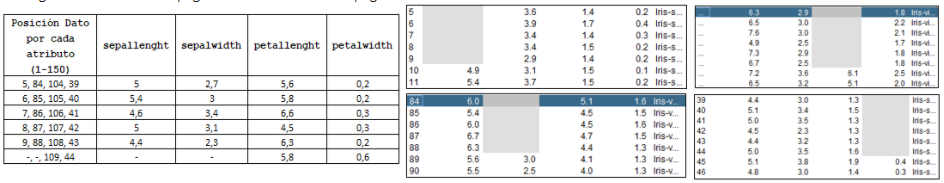

1. El primer filtro método utilizado fue **ReplaceMissingValues**, el cual calcula la media de los valores existentes o llamados de 'entrenamiento' para cada uno de los 4 atributos y los asigna a los valores perdidos. Se excluye el atributo que se define como clase. Los valores de reemplazo para los valores perdidos de cada atributo son los siguientes:

**sepallenght: 5.87655172413793**

**sepalwidth: 3.05931034482759**

**petallenght: 3.675**

**petalwidth: 1.23611111111111**

2. el segundo método utilizado fue **ReplaceMissingWithUserConstant**. Este método asigna a los valores perdidos una constante ingresada por el usuario a Weka. Para este método se utilizó la moda como constante de reemplazo. Los valores respectivos se muestran en seguida:

**sepallenght: 5.1**

**sepalwidth: 3**

**petallenght: 1.5**

**petalwidth: 0.2**

**Discusión:** el método **ReplaceMissingValues** utiliza como medida de centralidad el promedio, lo que no es tan desventajoso ya que no se observan datos atípicos. El método también asigna valores en todos los atributos lo que es bastante ágil.

Por otra parte, el método **ReplaceMissingWithUserConstant** requiere especificar la constante de reemplazo para cada atributo de manera independiente, generando un reproceso.

Sin embargo, al realizar un análisis de los resultados se puede decir que el mejor de estos dos métodos es el de **ReplaceMissingWithUserConstant**, ya que al evaluar la diferencia entre los valores reales y los de reemplazo se obtiene una diferencia total menor para tres de los atributos, a excepción del atributo *petallenght*. En seguida se muestra el análisis realizado:

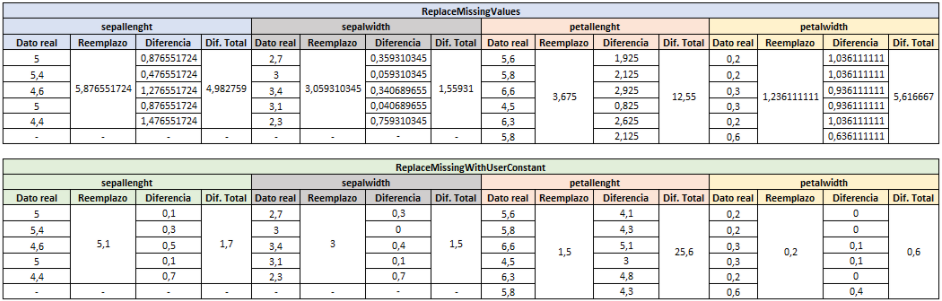

## **b. Normalizar usando varios metodos.**
En la imagen se observa la normalización con el método **Min_Max**, donde al costado izquierdo se realizó en el intervalo [0,1] y al costado derecho en el intervalo [-1,1].

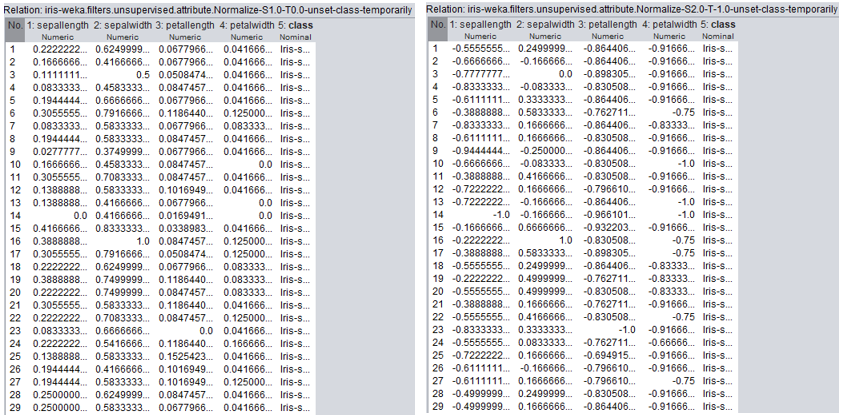

**Discretizar**

1. ***Dicretize:*** en las configuraciones de este método no supervisado se ajustó para que el algoritmo calcule el número de bins con una amplitud igual, optimizada por medio de leave-one-out. En la imagen se Observa como la cantidad de bins varía para cada atributo.

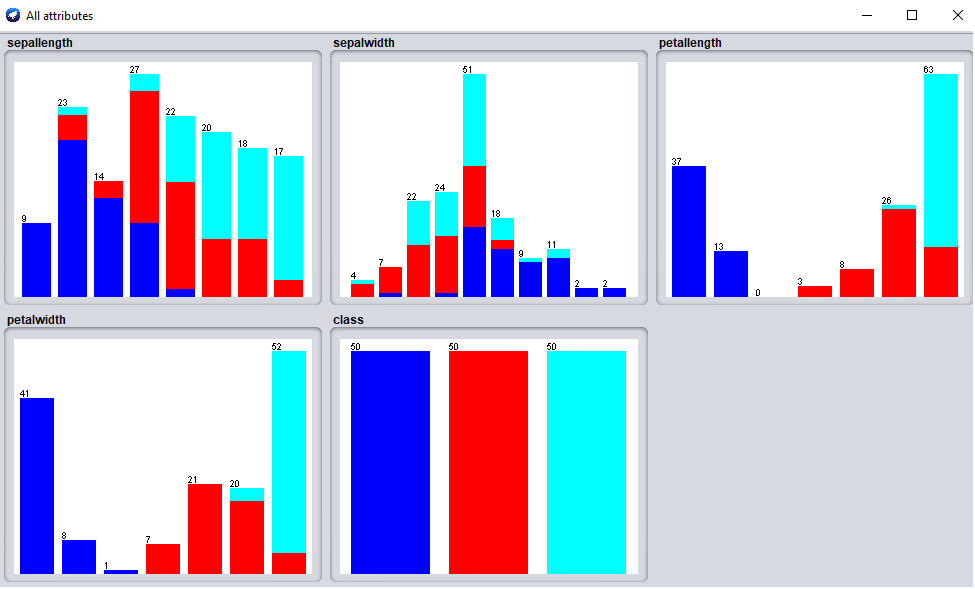

2. **PKIDiscretize:** este algoritmo obliga a que la frecuencia dentro de cada bin sea igual, y además forza a que número de bins se igual a la reíz cuadrada de los valores que contiene el atributo numérico, con n =150

$\sqrt{n} = \sqrt{150} = 12.24 = 12(bins)$

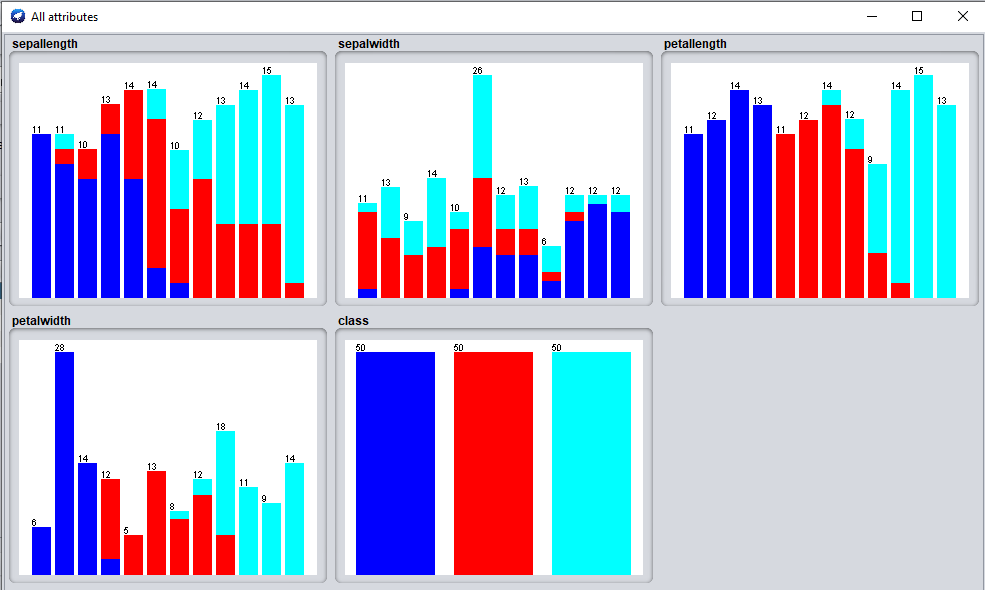

# **6. Dado el conjunto de datos:**

Realizar reducción de valores basado en la técnica de BIN con el mejor corte para lo siguiente
(mostrar pasos):

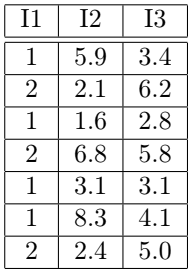

## **a. Dimensión I2 usando la media como representantes de 2 BINS.**

$I2 = \{{5.9, 2.1, 1.6, 6.8, 3.1, 8.3, 2.4}\}$

1. I2 ordenado = $\{{1.6, 2.1, 2.4, 3.1, 5.9, 6.8, 8.3}\}$

2. Bins iniciales = $\{{1.6, 2.1, 2.4, 3.1 - 5.9, 6.8, 8.3}\}$

3. Medias = $\{{2.3 - 7.0}\}$

4. Total ER = $4.4$

Este procedimiento se realiza 3 veces más moviendo valores extremos de los bins para buscar mejores posibles soluciones. En la siguiente tabla se muestra el resumen del procedimiento.

Como resultados se obtuvo que el ER mínimo es de 4.4

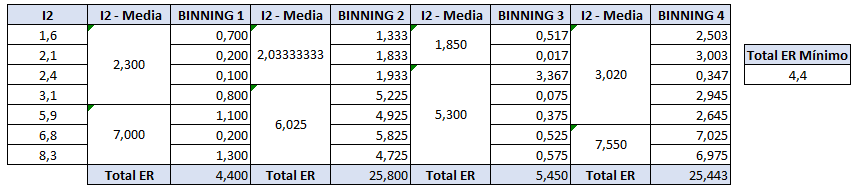

## **b. Dimensión I2 usando el límite más cercano como representantes de 2 BINS.**

$I2 = \{{3.4, 6.2, 2.8, 5.8, 3.1, 4.1, 5.0}\}$

1. I2 ordenado = $\{{2.8,3.1, 3.4, 4.1, 5.0, 5.8, 6.2}\}$

2. Bins iniciales = $\{{2.8,3.1, 3.4 - 4.1, 5.0, 5.8, 6.2}\}$

3. Valores más cercanos = $\{{2.8, 2.8, 3.4 - 4.1, 4.1, 6.2, 6.2}\}$

4. Modas = $\{{2.8 - 4.1}\}$

Al calcular por límites más cercanos dentro de cada bin se obtiene el numeral $4$. En seguida se utiliza la moda como representación de cada bin y se calcula el ER.

Este procedimiento se realiza 3 veces más moviendo valores extremos de los bins para buscar mejores posibles soluciones. En la siguiente tabla se muestra el resumen del procedimiento.

Como resultados se obtuvo que el ER mínimo es de 4.8

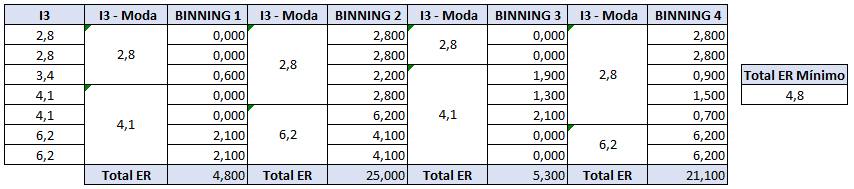

# **7. Dado el conjunto de datos con tres dimensiones de entrada y una dimension representando la clase:**

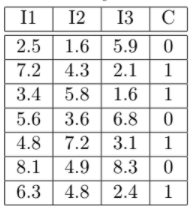

Hacer el ranking de las dimensiones realizando comparación de medias y varianzas

In [ ]:
data = {"I1":[2.5,7.2,3.4,5.6,4.8,8.1,6.3], "I2":[1.6,4.3,5.8,3.6,7.2,4.9,4.8], "I3":[5.9,2.1,1.6,6.8,3.1,8.3,2.4], "C":["0","1","1","0","1","0","1"],}
conjunto = pd.DataFrame(data)
print(conjunto)
print()
print()
print('Cálculo de las medias de cada dimensión por clase')
medias = pd.DataFrame(conjunto.groupby(["C"])[["I1","I2","I3"]].mean().round(3))
print(medias)
print()
print()
print('Cálculo de las varianzas de cada dimensión por clase')
varianzas = pd.DataFrame(conjunto.groupby(["C"])[["I1","I2","I3"]].var().round(3))
print(varianzas)
print()
print()
print('Aplicación del test por dimensión y clase')
SEI1 = np.sqrt(((varianzas["I1"]["0"])/3)+((varianzas["I1"]["1"])/4))
print("SE(I10-I11): ",SEI1)
SEI2 = np.sqrt(((varianzas["I2"]["0"])/3)+((varianzas["I2"]["1"])/4))
print("SE(I20-I21): ",SEI2)
SEI3 = np.sqrt(((varianzas["I3"]["0"])/3)+((varianzas["I3"]["1"])/4))
print("SE(I30-I31): ",SEI3)
print()
print()
print('Ranking de las dimensiones con umbral de 0.5')
rankI1 = np.abs((medias["I1"]["0"] - (medias["I1"]["1"]))/SEI1).round(3)
print("|Media(I10) - Media(I11)|/SE(I10 - I11) = ", rankI1)
rankI2 = np.abs((medias["I2"]["0"] - (medias["I2"]["1"]))/SEI2).round(3)
print("|Media(I20) - Media(I21)|/SE(I20 - I21) = ", rankI2)
rankI3 = np.abs((medias["I3"]["0"] - (medias["I3"]["1"]))/SEI3).round(3)
print("|Media(I30) - Media(I31)|/SE(I30 - I31) = ", rankI3)
print()
print()
print("Variable candidadta para reducción I1: ",min(rankI1,rankI2,rankI3))
print("El ranking es: [I1, I2, I3]")

#ranking = {"Dimensiones":[rankI1, rankI2,rankI3]}
#print(ranking.sort_values(by=["Dimensiones"]))
#ranking

    I1   I2   I3  C
0  2.5  1.6  5.9  0
1  7.2  4.3  2.1  1
2  3.4  5.8  1.6  1
3  5.6  3.6  6.8  0
4  4.8  7.2  3.1  1
5  8.1  4.9  8.3  0
6  6.3  4.8  2.4  1


Cálculo de las medias de cada dimensión por clase
      I1     I2   I3
C                   
0  5.400  3.367  7.0
1  5.425  5.525  2.3


Cálculo de las varianzas de cada dimensión por clase
      I1     I2     I3
C                     
0  7.870  2.763  1.470
1  2.802  1.636  0.393


Aplicación del test por dimensión y clase
SE(I10-I11):  1.8231383198576385
SE(I20-I21):  1.1532562594670794
SE(I30-I31):  0.7669745758498125


Ranking de las dimensiones con umbral de 0.5
|Media(I10) - Media(I11)|/SE(I10 - I11) =  0.014
|Media(I20) - Media(I21)|/SE(I20 - I21) =  1.871
|Media(I30) - Media(I31)|/SE(I30 - I31) =  6.128


Variable candidadta para reducción I1:  0.014
El ranking es: [I1, I2, I3]


# **8.Dado el conjunto de datos X, donde X1 y X2 son dimensiones numericas, X3 y X4 son dimensiones con datos categoricos:**

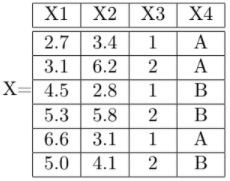

## **a. Aplicar el método se selección de características basado en la entropía para reducir una dimensión (mostrar pasos).**

Primero se procede a generar la matriz de similitud y apartir de esta matriz se obtiene la entropía total de todos los datos. Con la entropía total, ya se procede a iterar de manera que se seleccionan las variables a eliminar de acuerdo a la mínima ganancia de información.

El ranking es: $[X1, X2, X3, X4]$

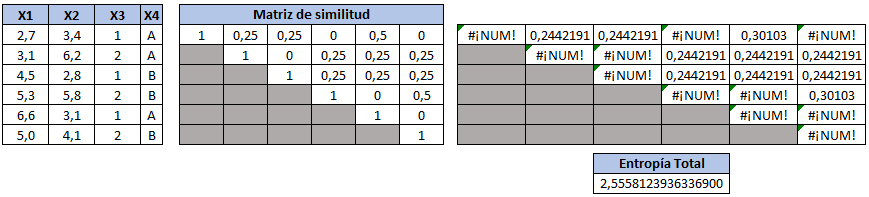

1. ***Primera Iteración:*** se selecciona la primera variablcaracterística o variable a eliminar. Se selecciona la variable **X1**.

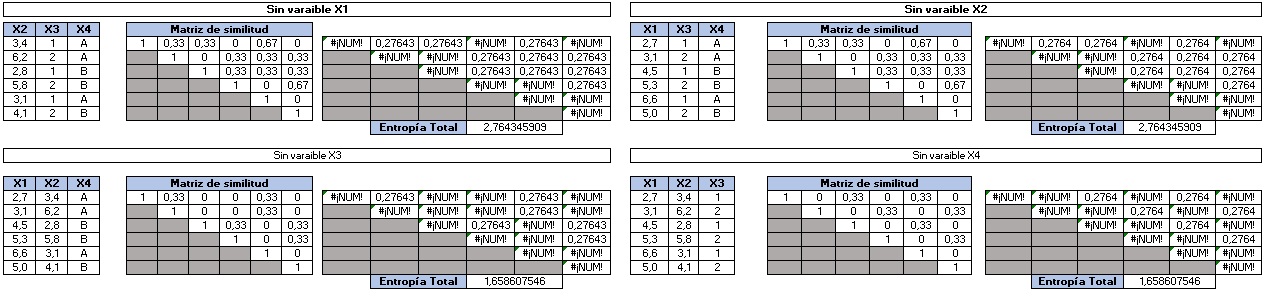

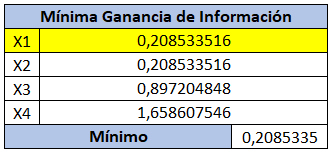

2. ***Segunda Iteración:*** se selecciona la varaible **X2**.

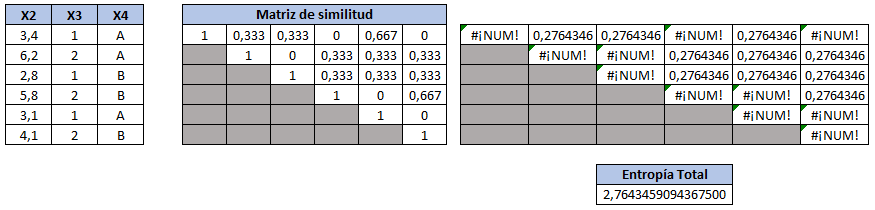

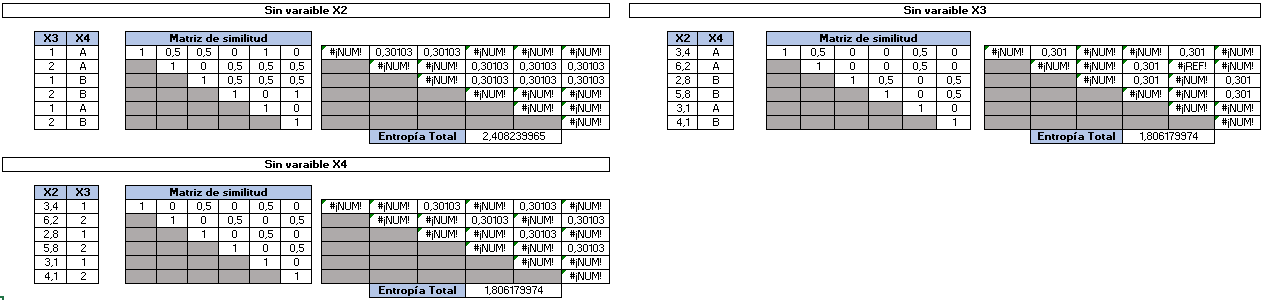

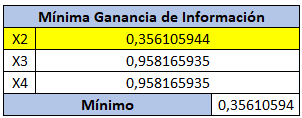

3. ***Iteración tercera Iteración:*** se selcciona la variable **X3**.

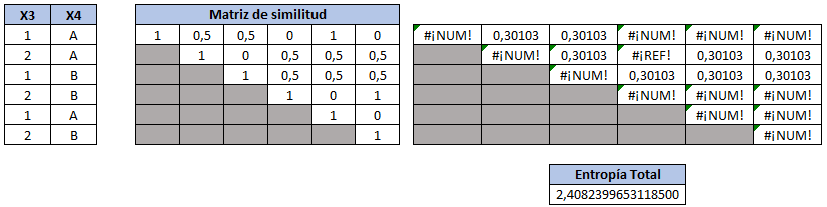

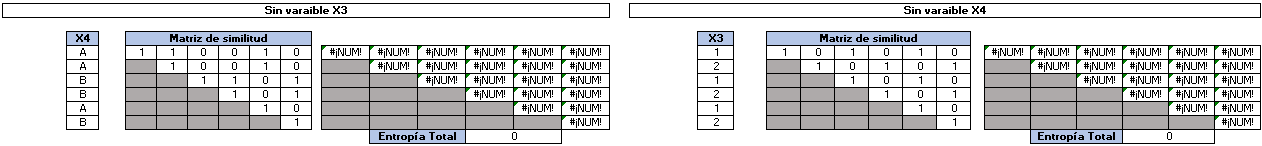

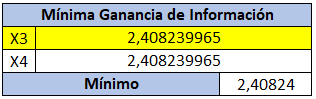

# **9. Al conjunto de datos Adult del repositorio de Machine learning:**

## **a. Convertir todos los atributos numéricos a categóricos utilizando dos estrategias diferentes.**

En primer lugar, se carga el conjunto de datos "Adult" en el software Weka. Una vez cargados, el software identifica el tipo de atributo para los datos como se muestra en la primera fila de la imagen. La imagen también permite identificar como los datos de los atributos numéricos son de tipo entero.

Como estrategias se adoptan las denominadas en Weka como **Discretize** y **PKIDiscretize**. 

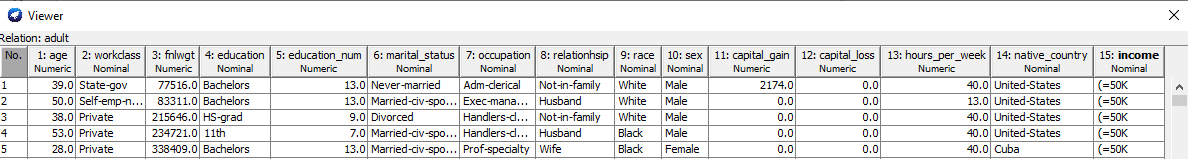

1. **Discretize:** este método supervisado discretiza un rango de atributos numéricos del conjunto de datos, haciéndolos atributos nominales. La discretización se realiza con el método de Fayyad & Irani MDL y su configuración por defecto. *texto en cursiva*

En la imagen se muestra como todos los atributos son ahora de tipo nominal.

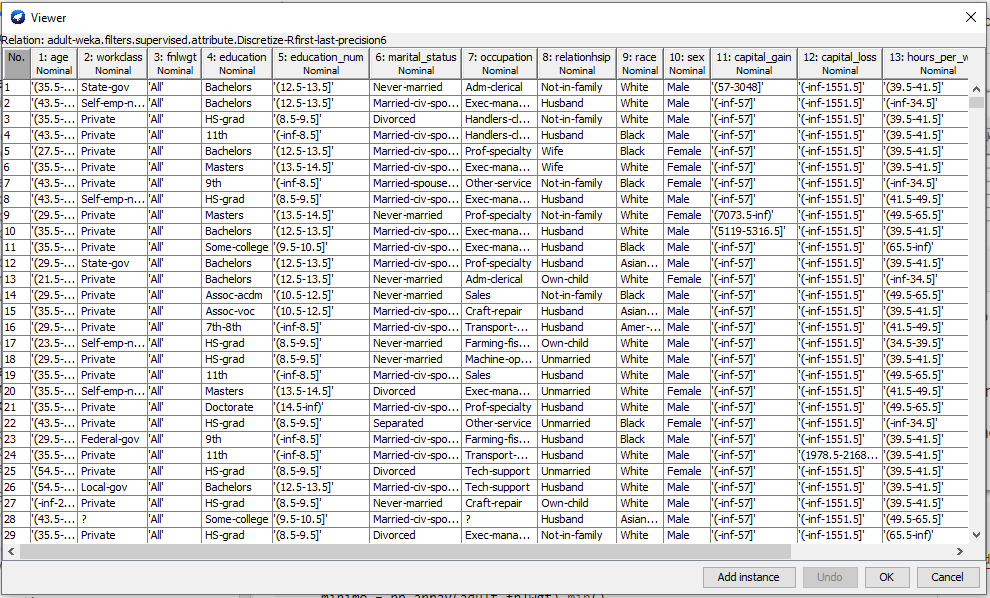

2. **PKIDiscretize:** es te es un método no supervisado, el cual utiliza la misma frecuencia para cada bin y adenás forza a que la cantidad máxima de bins se igual a la raíz de $n$, siendo $n$ el número de datos en el atributo numérico:  $\sqrt{n}=\sqrt{32561}=180.45=180 (bins)$.

En las siguientes imágenes se muestra como se realizo la discretización para todos los atributos numéricos y la visualización gráfica de los datos.

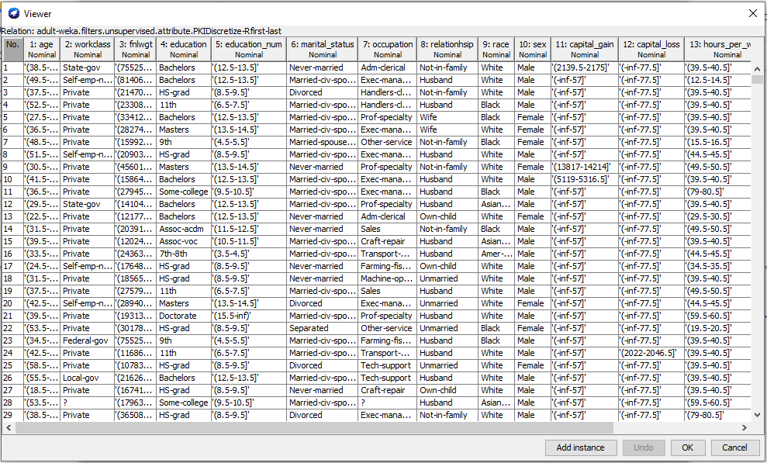

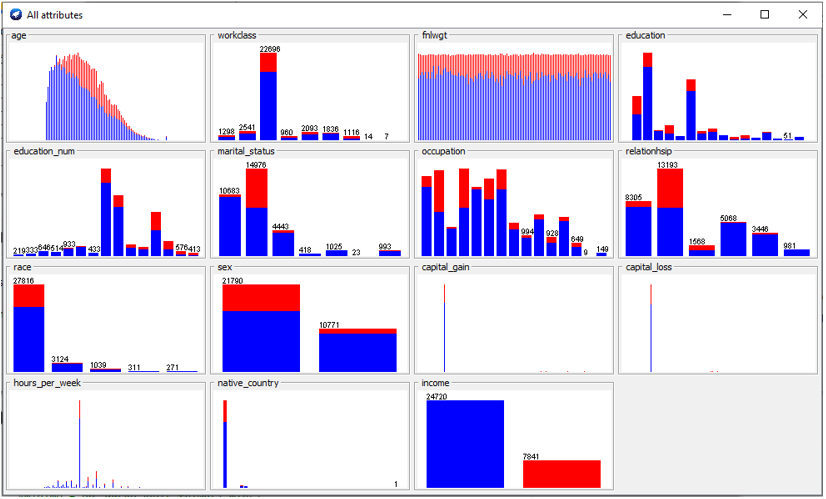

# **10. Escoger un conjunto de datos del repositorio de Machine learning, que tenga varias dimensiones y que sean numéricas, y aplicar PCA. Describir el nuevo conjunto de datos.**

Se selecciona el conjunto de datos "Wine", el cual contiene 13 variables y tres clases $(1, 2, 3)$. 

* El set de datos se carga al software libre Weka, en el cual se realiza en primera instancia la normalización de las 13 varaibles numéricas en una escala $[0,1]$.

* PCA: depués de haber normalizado los datos, se procede a aplicar el filtro no supervizado "**PincipalComponents**". Este filtro hace el análisis de los principales componentes y la transformación de los datos. La reducción se logra seleccionando los suficientes *eigenvectors* para contemplar algo de la varianza de los datos originales (95%por defecto).

Luego de haber aplicado PCA, de las 13 varaibles numéricas se hizo una reducción a 10 variables.

**Conclusión:** como se ve en la segunda imagen, las nuevas variables/dimensiones del conjunto de datos, son una combinación de las variables originales. También es posible visualizar de forma gráfica por pares las nuevas variables (Imaagen3, imagen4). Se logra la reducción de dimensionalidad pero se vuelve complejo entender las nuevas dimensionsiones y sus relaciones entre sí.

* **Variables de los datos originales**

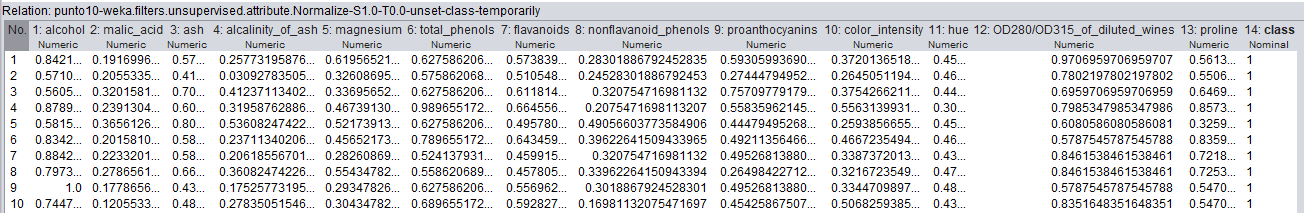

* **Variables después de PCA**: se muestra como lista por facilidad de visualizaicón.

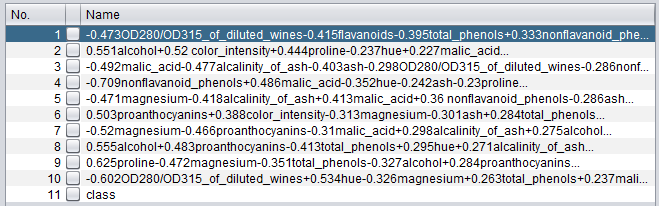

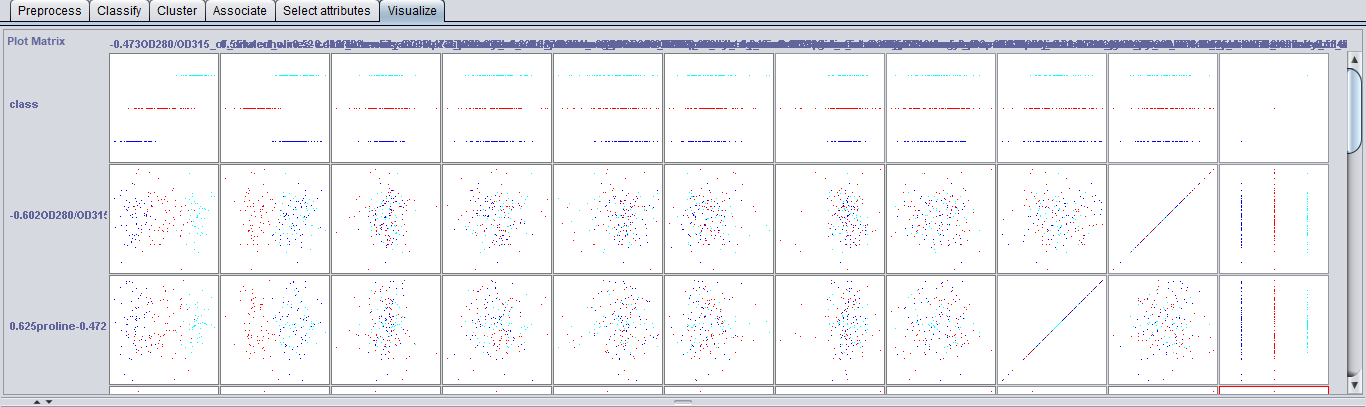

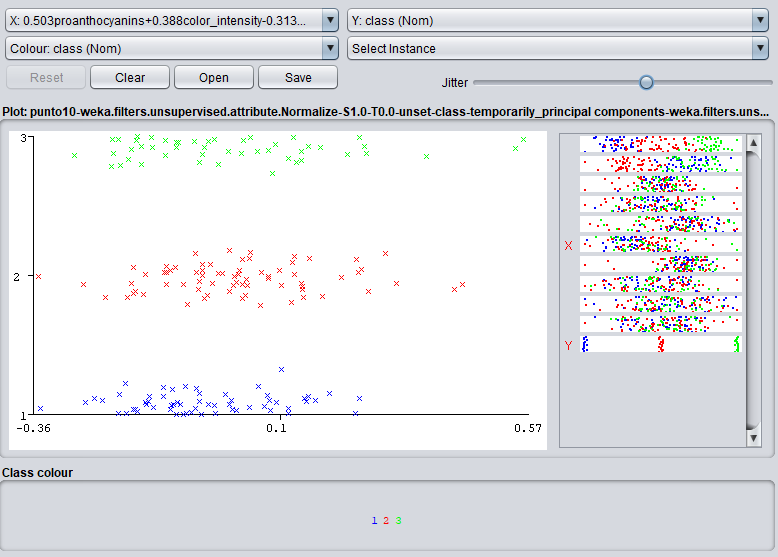

# **11. Cargar el dataset "Labor" incluido en Weka y aplicar filtros para reemplazo de datos perdidos.**

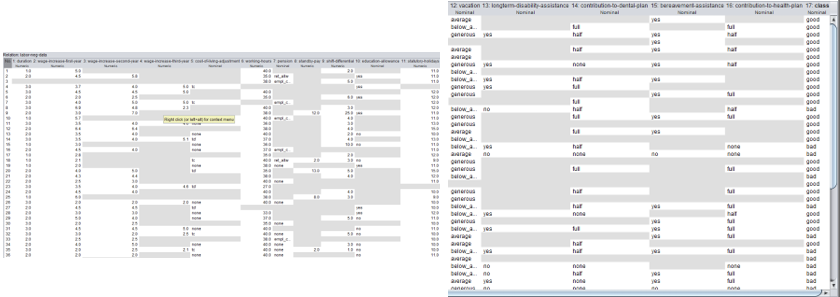

El  filtro  utilizado fue **ReplaceMissingValues**, el cual calcula la media de los valores existentes o llamados de 'entrenamiento' para cada uno de los 4 atributos y los asigna a los valores perdidos. Se excluye el atributo que se define como clase.

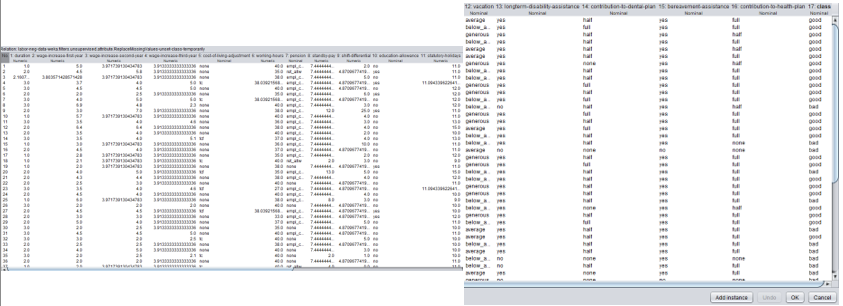